In [0]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from matplotlib import pyplot
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
totalhouses=pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/halfhourly_dataset/totalhouses.csv', parse_dates=['tstp'], index_col="tstp")

In [0]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:30:00,0.110,0.075,0.055,0.938,0.201,0.049,0.01,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.00,0.163,0.092,0.059,0.534,3.183
2011-11-23 14:30:00,0.241,0.318,0.106,0.752,0.248,0.048,0.00,0.177,0.093,0.088,0.353,2.424
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.00,0.162,0.158,0.086,0.242,2.484
2011-11-23 15:30:00,0.296,0.121,0.139,0.261,0.281,0.048,0.00,0.162,0.142,0.116,0.324,1.890


In [0]:
totalhouses.tail()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2014-02-27 22:00:00,0.456,0.631,0.243,0.567,0.184,0.145,0.072,0.192,0.154,0.097,0.396,3.137
2014-02-27 22:30:00,0.354,0.178,0.171,0.695,0.327,0.139,0.083,0.166,0.168,0.065,0.264,2.610
2014-02-27 23:00:00,0.263,0.108,0.132,0.807,0.163,0.141,0.051,0.171,0.142,0.026,0.264,2.268
2014-02-27 23:30:00,0.298,0.078,0.126,0.308,0.122,0.139,0.000,0.168,0.033,0.024,0.330,1.626
2014-02-28 00:00:00,0.218,0.113,0.123,2.249,0.167,0.141,0.000,0.161,0.048,0.026,0.213,3.459


In [0]:
len(totalhouses)

39665

In [0]:
index=totalhouses.index

In [0]:
totalhouses.index = totalhouses.index.floor('1H')


In [0]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.01,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.00,0.163,0.092,0.059,0.534,3.183
2011-11-23 14:00:00,0.241,0.318,0.106,0.752,0.248,0.048,0.00,0.177,0.093,0.088,0.353,2.424
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.00,0.162,0.158,0.086,0.242,2.484
2011-11-23 15:00:00,0.296,0.121,0.139,0.261,0.281,0.048,0.00,0.162,0.142,0.116,0.324,1.890


In [0]:
totalhouses = totalhouses.loc[~totalhouses.index.duplicated(keep='first')]

In [0]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.010,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.000,0.163,0.092,0.059,0.534,3.183
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.000,0.162,0.158,0.086,0.242,2.484
2011-11-23 16:00:00,0.253,0.141,0.070,0.297,0.258,0.048,0.000,0.171,0.066,0.148,0.172,1.624
2011-11-23 17:00:00,0.234,0.226,0.329,0.760,0.272,0.048,0.078,0.381,0.062,0.137,0.218,2.745


In [0]:
len(totalhouses)

19848

In [0]:
totalhouses.tail()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2014-02-27 20:00:00,0.610,0.143,0.188,0.815,0.468,0.149,0.087,0.158,0.028,0.146,0.205,2.997
2014-02-27 21:00:00,0.750,0.576,0.408,0.450,0.248,0.151,0.072,0.166,0.158,0.178,0.125,3.282
2014-02-27 22:00:00,0.456,0.631,0.243,0.567,0.184,0.145,0.072,0.192,0.154,0.097,0.396,3.137
2014-02-27 23:00:00,0.263,0.108,0.132,0.807,0.163,0.141,0.051,0.171,0.142,0.026,0.264,2.268
2014-02-28 00:00:00,0.218,0.113,0.123,2.249,0.167,0.141,0.000,0.161,0.048,0.026,0.213,3.459


In [0]:
df1=totalhouses['consumo_agregado']

In [0]:
df1.head()

tstp
2011-11-23 13:00:00    2.473
2011-11-23 14:00:00    3.183
2011-11-23 15:00:00    2.484
2011-11-23 16:00:00    1.624
2011-11-23 17:00:00    2.745
Name: consumo_agregado, dtype: float64

In [0]:
df1.dtypes

dtype('float64')

In [0]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 7
neurons_exp = 10
predict_values_exp = 168
lag_exp=24

In [0]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [0]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [0]:
# scale train and test data to [0, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [0]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [0]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

In [0]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [0]:
# transform data to be stationary
raw_values = df1.values
diff_values = difference(raw_values, 1)

In [0]:
raw_values

array([2.473    , 3.183    , 2.484    , ..., 3.137    , 2.268    ,
       3.4590001])

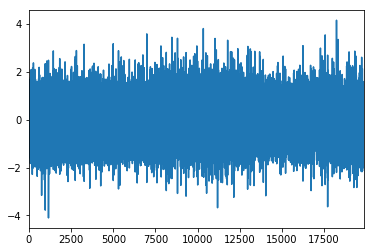

In [0]:
diff_values.plot()

In [0]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [0]:
supervised_values[100]

array([-0.997    ,  0.525    ,  1.771    ,  0.207    , -0.2      ,
        0.657    , -0.274    , -0.451    ,  0.448    , -0.205    ,
        0.159    , -0.5710001,  0.5110001, -0.071    , -1.8299999,
       -0.1930002,  1.6470001, -1.597    ,  0.413    ,  0.677    ,
       -0.175    , -0.183    , -0.678    ,  0.419    , -0.023    ])

In [0]:
len(supervised_values)

19847

In [0]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [0]:
train[5]

array([ 0.208,  1.121, -0.86 , -0.699,  0.71 ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.726])

In [0]:
test[5]

array([-0.008    , -0.166    , -2.152    ,  0.2660001, -0.5940001,
        1.123    , -0.413    ,  0.014    ,  0.175    ,  0.06     ,
       -0.14     ,  0.898    ,  0.319    , -0.904    ,  1.185    ,
       -0.373    , -0.991    ,  1.57     ,  0.057    , -0.376    ,
       -1.494    ,  1.85     ,  0.111    ,  0.138    ,  0.45     ])

In [0]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [0]:
train_scaled[5]

array([0.52247124, 0.63307087, 0.3930951 , 0.41259843, 0.58328287,
       0.49727439, 0.49727439, 0.49727439, 0.49727439, 0.49727439,
       0.49727439, 0.49727439, 0.49727439, 0.49727439, 0.49727439,
       0.49727439, 0.49727439, 0.49727439, 0.49727439, 0.49727439,
       0.49727439, 0.49727439, 0.49727439, 0.49727439, 0.58522109])

In [0]:
train_scaled.shape

(19679, 25)

In [0]:
test_scaled.shape

(168, 25)

In [0]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

W0706 17:38:18.696918 139933869553536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 17:38:18.743193 139933869553536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 17:38:18.751141 139933869553536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 17:38:19.025722 139933869553536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 17:38:19.249216 139933869553536 deprecation.py:323

Epoch 1/1
19679/19679 [==============================] - 33s 2ms/step - loss: 0.0083
Epoch 1/1
19679/19679 [==============================] - 33s 2ms/step - loss: 0.0076
Epoch 1/1
19679/19679 [==============================] - 33s 2ms/step - loss: 0.0073
Epoch 1/1
19679/19679 [==============================] - 33s 2ms/step - loss: 0.0073
Epoch 1/1
19679/19679 [==============================] - 35s 2ms/step - loss: 0.0071
Epoch 1/1
19679/19679 [==============================] - 34s 2ms/step - loss: 0.0069
Epoch 1/1
19679/19679 [==============================] - 33s 2ms/step - loss: 0.0068


In [0]:
test_scaled[1, 0:-1]

array([0.42531798, 0.63331315, 0.4472441 , 0.49897033, 0.51847366,
       0.50454271, 0.48031497, 0.60605694, 0.53591763, 0.387765  ,
       0.64082375, 0.45208965, 0.37722593, 0.68746215, 0.50417929,
       0.45172623, 0.31629316, 0.72138099, 0.51072078, 0.51399153,
       0.49666869, 0.27643853, 0.46614174, 0.44167173])

In [0]:
test_scaled[1, -1]

0.5294972929072961

In [0]:
len(test_scaled)

168

In [0]:
len(train)

19679

In [0]:
len(raw_values)

19848

In [0]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=1.503768, Expected=3.393000
Hour=2, Predicted=2.557921, Expected=3.659000
Hour=3, Predicted=2.986677, Expected=1.507000
Hour=4, Predicted=0.866182, Expected=1.341000
Hour=5, Predicted=1.280786, Expected=1.333000
Hour=6, Predicted=1.500135, Expected=1.783000
Hour=7, Predicted=2.059420, Expected=1.876000
Hour=8, Predicted=2.072778, Expected=3.625000
Hour=9, Predicted=3.392884, Expected=1.656000
Hour=10, Predicted=1.749124, Expected=1.994000
Hour=11, Predicted=2.403506, Expected=2.385000
Hour=12, Predicted=2.866360, Expected=1.148000
Hour=13, Predicted=1.111528, Expected=1.333000
Hour=14, Predicted=1.570218, Expected=2.756000
Hour=15, Predicted=3.031934, Expected=2.410000
Hour=16, Predicted=2.514741, Expected=2.508000
Hour=17, Predicted=2.782361, Expected=2.756000
Hour=18, Predicted=3.078586, Expected=3.200000
Hour=19, Predicted=3.184638, Expected=5.057000
Hour=20, Predicted=4.996025, Expected=3.389000
Hour=21, Predicted=3.315899, Expected=4.984000
Hour=22, Predicted=4.9

In [0]:
# Evaluate performance
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ",(np.mean(np.abs((expectations - predictions) / expectations))*100))

Mean Absolute Percent Error:  29.93939963214404


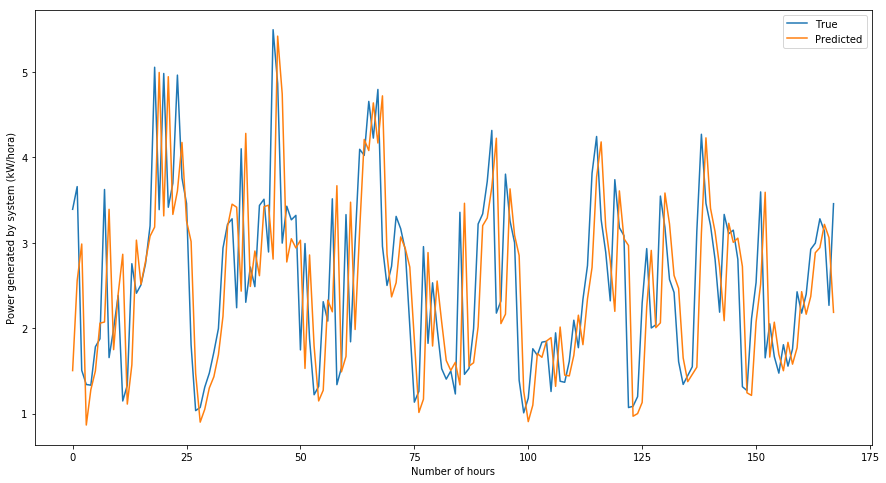

In [0]:
# line plot of observed vs predicted
pyplot.figure(figsize=(15,8))
pyplot.plot(expectations, label="True")
pyplot.plot(predictions, label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW/hora)")
pyplot.show()